# Salmon and Seabass

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats

# nice parameters for matplotlib
import matplotlib as mpl
mpl.rcParams["figure.figsize"] = [12.0, 10.0]
mpl.rcParams["legend.fontsize"] = "large"
mpl.rcParams["figure.titlesize"] = "medium"

## Data

In [2]:
salmon = np.array([3, 4, 5, 6, 7.])
seabass = np.array([5, 6, 7, 8, 9, 7 + np.sqrt(2), 7 - np.sqrt(2)])

## Compute the Sample Statistics

In [3]:
mu_hat_salmon = np.mean(salmon)
sd_hat_salmon = np.std(salmon)
pi_hat_salmon = len(salmon) / (len(salmon) + len(seabass))
mu_hat_seabass = np.mean(seabass)
sd_hat_seabass = np.std(seabass)
pi_hat_seabass = len(seabass) / (len(salmon) + len(seabass))

In [4]:
mu_hat_salmon, mu_hat_seabass

(5.0, 7.0)

In [5]:
sd_hat_salmon, sd_hat_seabass

(1.4142135623730951, 1.4142135623730951)

In [6]:
pi_hat_salmon, pi_hat_seabass

(0.4166666666666667, 0.5833333333333334)

## Plot the Estimated PDFs

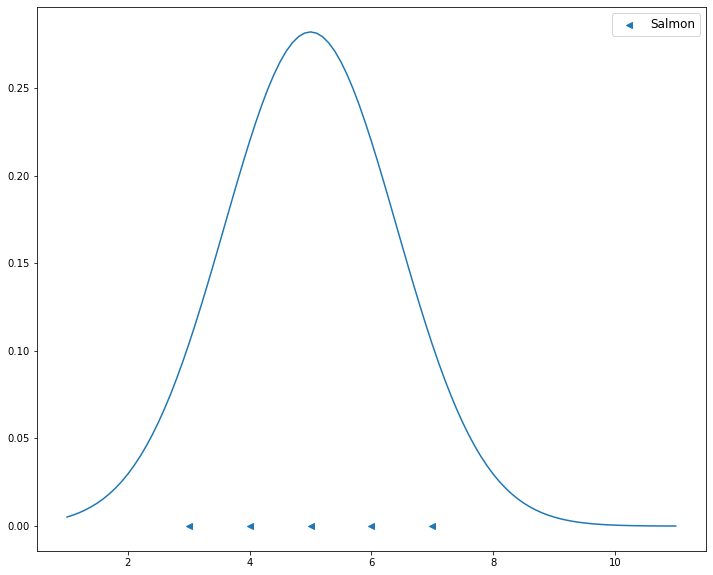

In [7]:
weights = np.linspace(1, 11, 101)
plt.plot(weights, stats.norm.pdf(weights, mu_hat_salmon, sd_hat_salmon))
plt.scatter(salmon, np.zeros_like(salmon), marker="<", label="Salmon")
plt.legend()
plt.show()

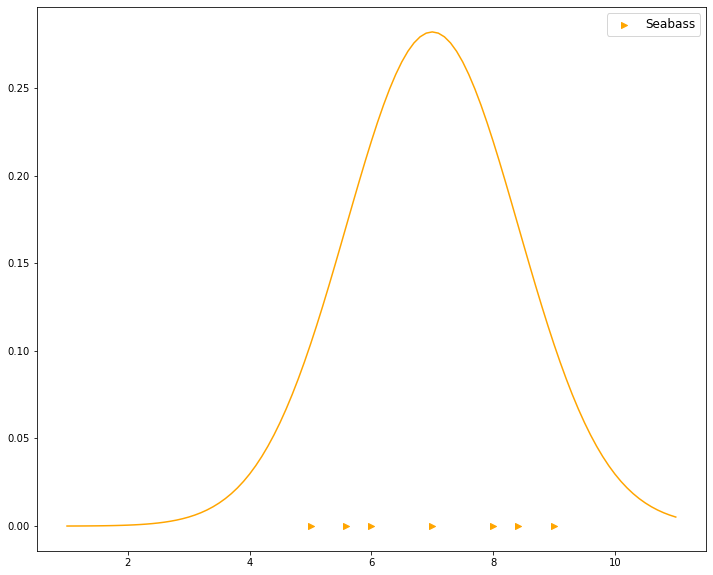

In [8]:
plt.plot(weights, stats.norm.pdf(weights, mu_hat_seabass, sd_hat_seabass), color="orange")
plt.scatter(seabass, np.zeros_like(seabass), marker=">", label="Seabass", color="orange")
plt.legend()
plt.show()

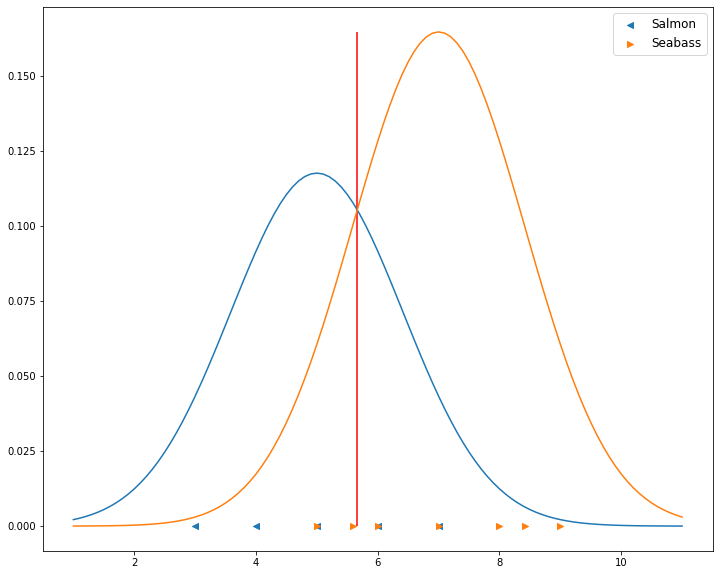

In [9]:
distribution_with_prior_salmon = pi_hat_salmon * stats.norm.pdf(weights, mu_hat_salmon, sd_hat_salmon)
distribution_with_prior_seabass = pi_hat_seabass * stats.norm.pdf(weights, mu_hat_seabass, sd_hat_seabass)
decision_boundary = 5.66

weights = np.linspace(1, 11, 101)
plt.plot(weights, distribution_with_prior_salmon)
plt.scatter(salmon, np.zeros_like(salmon), marker="<", label="Salmon")
plt.plot(weights, distribution_with_prior_seabass)
plt.scatter(seabass, np.zeros_like(seabass), marker=">", label="Seabass")
plt.vlines(decision_boundary,
           0, np.max([distribution_with_prior_salmon, distribution_with_prior_seabass]),
           color="red")
plt.legend()
plt.show()

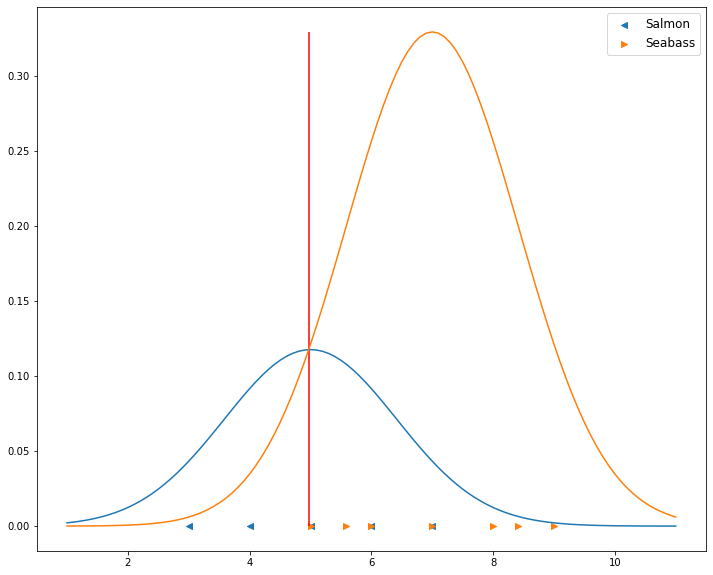

In [10]:
distribution_with_loss_salmon = 1 * pi_hat_salmon * stats.norm.pdf(weights, mu_hat_salmon, sd_hat_salmon)
distribution_with_loss_seabass = 2 * pi_hat_seabass * stats.norm.pdf(weights, mu_hat_seabass, sd_hat_seabass)
decision_boundary = 6 + np.log(5/14)

weights = np.linspace(1, 11, 101)
plt.plot(weights, distribution_with_loss_salmon)
plt.scatter(salmon, np.zeros_like(salmon), marker="<", label="Salmon")
plt.plot(weights, distribution_with_loss_seabass)
plt.scatter(seabass, np.zeros_like(seabass), marker=">", label="Seabass")
plt.vlines(decision_boundary,
           0, np.max([distribution_with_loss_salmon, distribution_with_loss_seabass]),
           color="red")
plt.legend()
plt.show()